# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the training and testing dataset into a Pandas Dataframe.

In [2]:
# Load training data
dfTrain = pd.DataFrame.from_csv('train.tsv', sep='\t')
from sklearn.model_selection import train_test_split
dfTrain, dfValidate, dfTrainTarget, dfValidateTarget = train_test_split(dfTrain.drop('price',1), dfTrain['price'], test_size=0.33, random_state=42)
dfTrainTarget = pd.DataFrame(dfTrainTarget)
dfValidateTarget = pd.DataFrame(dfValidateTarget)
dfTest = pd.DataFrame.from_csv('test.tsv',sep='\t')

In [3]:
dfTrain.head(5)

,name,item_condition_id,category_name,brand_name,shipping,item_description
train_id,,,,,,
223243,FUNKO POP OVERWATCH DVA CARBON FIBER MEC,1,Kids/Toys/Action Figures & Statues,Funko,1,New dva with carbon meka Free shipping
363758,Mocha jumpsuit new never worn,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,1,"New cotton + spandex jumpsuit I have hot pink,..."
1358119,Leggings,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,0,"Sexy Butt Lifting Leggings Sexy, youthful, fig..."
198564,Nike huarache sneakers,3,Kids/Boys (4+)/Shoes,Nike,0,Very good condition huaraches. Size 5.5y in ki...
71297,Lularoe XS Joy,1,"Women/Sweaters/Vest, Sleeveless",LuLaRoe,0,Bought and never wore


In [4]:
# In this chunk we split the category into a hierarchical system of subcategories.
def split_category(x):
    x1 = x[:] # Make a copy of the data frame
    x2 = x['category_name'].str.split('/', expand=True).astype(str) # Split the column category_name on the character '/'
    x = pd.concat([x1,x2],axis=1) # Concatenate two data frames
    x.columns.values[6:9] = np.array(['category_1','category_2','category_3'])
    if 3 in x:
        x = x.drop(3, 1) # There are some category_names that contain abundant '/' - We need to look into this.
    if 4 in x:
        x = x.drop(4, 1) # There are some category_names that contain abundant '/' - We need to look into this.
    x.drop('category_name',1)
    return x

#split category in several columns 
def split_cats(df, colname, sep='/'):
    new_cats = list(filter(None, list(map( lambda x: str(x).split(sep), df[colname][:]))))
    cat_names = list(map(lambda x: f"cat_{x}", range( 0, max(len(l) for l in new_cats) ) ) ) 
    newDF = pd.DataFrame( new_cats, columns=cat_names )
    return pd.concat([df, newDF], axis=1)

#dfTrain = split_category(dfTrain)
#dfTest = split_category(dfTest)
dfTrain = split_cats(dfTrain, 'category_name')
dfTest = split_cats(dfTest, 'category_name')

dfTrain.head(5)

,name,item_condition_id,category_name,brand_name,shipping,item_description,cat_0,cat_1,cat_2,cat_3,cat_4
0,MLB Cincinnati Reds T Shirt Size XL,3.0,Men/Tops/T-shirts,NaN,1.0,No description yet,Kids,Toys,Action Figures & Statues,None,None
1,Razer BlackWidow Chroma Keyboard,3.0,Electronics/Computers & Tablets/Components & P...,Razer,0.0,This keyboard is in great condition and works ...,Women,Athletic Apparel,"Pants, Tights, Leggings",None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,Women,Athletic Apparel,"Pants, Tights, Leggings",None,None
3,Leather Horse Statues,1.0,Home/Home Décor/Home Décor Accents,NaN,1.0,New with tags. Leather horses. Retail for [rm]...,Kids,Boys (4+),Shoes,None,None
4,24K GOLD plated rose,1.0,Women/Jewelry/Necklaces,NaN,0.0,Complete with certificate of authenticity,Women,Sweaters,"Vest, Sleeveless",None,None


In [9]:
print (dfTrain.loc[dfTrain['cat_4'].first_valid_index()])

name                                HOLD Kesha - Sperry Shoes UA Pants
item_condition_id                                                    3
category_name                           Women/Shoes/Loafers & Slip-Ons
brand_name                                                         NaN
shipping                                                             0
item_description     Bundle for Kesha: Sperry Top Slider Shoes Wome...
cat_0                                                      Electronics
cat_1                                              Computers & Tablets
cat_2                                                             iPad
cat_3                                                           Tablet
cat_4                                                     eBook Access
Name: 114, dtype: object


In [85]:
print('There are %s main categories in the data set. Namely: \n' 
      % dfTrain['category_1'].nunique(),
     ', '.join(dfTrain['category_1'].unique()))
print('There are %s middle categories in the data set.' % dfTrain['category_2'].nunique())
print('There are %s low-level categories in the data set.' % dfTrain['category_3'].nunique())
mainMidRatio = round(dfTrain['category_2'].nunique() / dfTrain['category_1'].nunique(),2)
print('That is an average of %s middle categories per main category.' %  mainMidRatio)
mainLowRatio = round(dfTrain['category_3'].nunique() / dfTrain['category_1'].nunique(),2)
print('That is an average of %s low-level categories per main category.' % mainLowRatio)

dfTrain.groupby(['category_1','category_2','category_3']).size()

There are 11 main categories in the data set. Namely: 
 Kids, Women, Men, Home, Beauty, Electronics, Handmade, nan, Other, Sports & Outdoors, Vintage & Collectibles
There are 114 middle categories in the data set.
There are 852 low-level categories in the data set.
That is an average of 10.36 middle categories per main category.
That is an average of 77.45 low-level categories per main category.


category_1  category_2           category_3                
Beauty      Bath & Body          Bath                           3379
                                 Bathing Accessories             236
                                 Cleansers                       476
                                 Other                           100
                                 Scrubs & Body Treatments        560
                                 Sets                            454
            Fragrance            Candles & Home Scents          1982
                                 Kids                             61
                                 Men                            1444
                                 Other                            25
                                 Sets                            307
                                 Women                         12466
            Hair Care            Conditioners                    326
                                 Hair & Sca

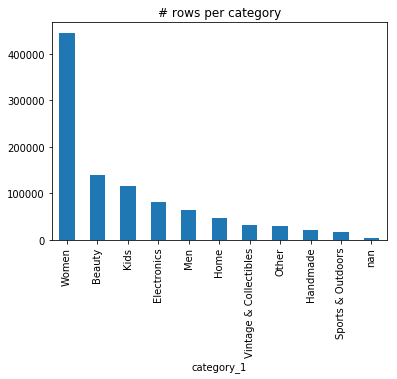

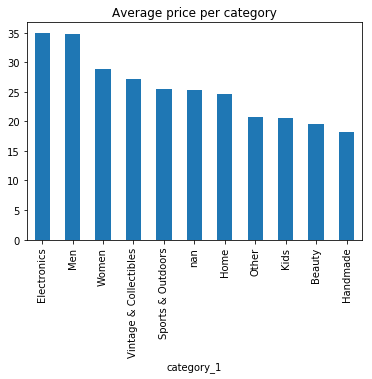

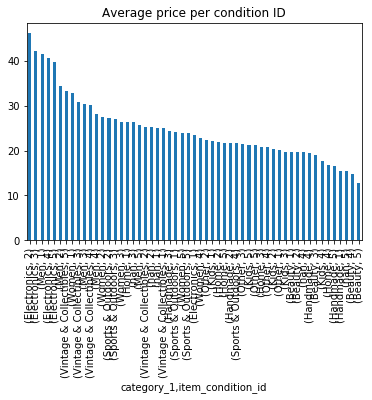

In [30]:
dfTrain.groupby('category_1').size().sort_values(ascending=False).plot(kind='bar')
plt.title('# rows per category')
plt.show()
pd.concat([dfTrain,dfTrainTarget],axis=1).groupby('category_1')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average price per category')
plt.show()
pd.concat([dfTrain,dfTrainTarget],axis=1).groupby(['category_1','item_condition_id'])['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average price per category and condition ID')
plt.show()

In [37]:
print('There are %s brands in the data set.' % dfTrain.groupby(['brand_name']).size().count())
print(dfTrain.groupby(['brand_name']).size().sort_values(ascending=False))


There are 4326 brands in the data set.
brand_name
Nike                    36338
PINK                    36224
Victoria's Secret       32247
LuLaRoe                 20781
Apple                   11590
FOREVER 21              10196
Nintendo                 9923
Lululemon                9707
Michael Kors             9333
American Eagle           8909
Rae Dunn                 8267
Sephora                  8164
Coach                    7002
Disney                   6986
Bath & Body Works        6918
Adidas                   6801
Funko                    6212
Under Armour             5643
Sony                     5364
Old Navy                 5129
Hollister                4607
Carter's                 4258
Urban Decay              4156
The North Face           4064
Independent              3972
Too Faced                3871
Xbox                     3815
Brandy Melville          3810
Kate Spade               3580
MAC                      3566
                        ...  
Katia               